In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
OUTPUT_DATA = False

In [51]:
fileName = "sample.csv"
#fileName = "train.csv"
#fileName = "validation.csv"
filePath = r"D:\Documents\MSc RaC\COMPG0124 Multi-agent Artificial Intelligence\coursework\cw1\data\\" + fileName

In [52]:
# Load data into pandas dataframe
df = pd.read_csv(filePath, sep=',',header=0, quotechar='"')

In [53]:
# Split 'useragent' field into 'OS' and 'browser'
dfn = df['useragent'].str.split('_', expand = True)
df['OS'] = dfn[0]
df['browser'] = dfn[1]
# Create slotsize field
df['slotsize'] = df['slotheight'] * df['slotwidth']

In [68]:
# Descriptive statistics
dfDesc = df.describe(include='all')
dfUnqCnt = df.nunique().to_frame().transpose().rename({0: 'unique_cnt'}, axis='index')
dfNaN = df.isna().sum().to_frame().transpose().rename({0: 'NaN'}, axis='index')
frames = [dfDesc, dfUnqCnt, dfNaN]
dfDesc = pd.concat(frames)

if OUTPUT_DATA: dfDesc.to_csv('descStats.csv')
dfDesc #show

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,OS,browser,slotsize
count,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,10000.000000,9778.000000,...,10000.000000,10000,10000.000000,10000.000000,7865,10000.000000,7867,10000,10000,10000.000000
unique,NaN,NaN,NaN,10000,9998,22,9491,NaN,NaN,NaN,...,NaN,114,NaN,NaN,18,NaN,5000,6,8,NaN
top,NaN,NaN,NaN,35c34e746c3774d8db108706d68a8c64e06a2e25,5809b02f6d9a206d368e664c449d53f5d5b94904,windows_ie,122.194.13.*,NaN,NaN,NaN,...,NaN,832b91d59d0cb5731431653204a76c0e,NaN,NaN,bebefa5efe83beee17a3d245e7c5085b,NaN,10063,windows,ie,NaN
freq,NaN,NaN,NaN,1,2,5993,13,NaN,NaN,NaN,...,NaN,576,NaN,NaN,1987,NaN,359,9507,5993,NaN
mean,0.000400,2.892900,13.552800,NaN,NaN,NaN,NaN,147.879200,153.023100,2.105032,...,27.119700,NaN,272.694000,78.826500,NaN,2841.929300,NaN,NaN,NaN,77029.436000
std,0.019997,2.066073,6.544516,NaN,NaN,NaN,NaN,101.628476,103.076202,0.874861,...,37.676875,NaN,28.915943,60.339005,NaN,780.105152,NaN,NaN,NaN,17403.785399
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,NaN,227.000000,0.000000,NaN,1458.000000,NaN,NaN,NaN,14040.000000
25%,0.000000,1.000000,10.000000,NaN,NaN,NaN,NaN,79.000000,79.000000,1.000000,...,0.000000,NaN,241.000000,33.000000,NaN,2259.000000,NaN,NaN,NaN,65520.000000
50%,0.000000,3.000000,14.000000,NaN,NaN,NaN,NaN,146.000000,149.000000,2.000000,...,5.000000,NaN,294.000000,68.000000,NaN,3358.000000,NaN,NaN,NaN,75000.000000
75%,0.000000,5.000000,19.000000,NaN,NaN,NaN,NaN,216.000000,222.000000,3.000000,...,50.000000,NaN,300.000000,100.000000,NaN,3427.000000,NaN,NaN,NaN,90000.000000


# CTR
#### (the mean would have been equivalent in this dataset)

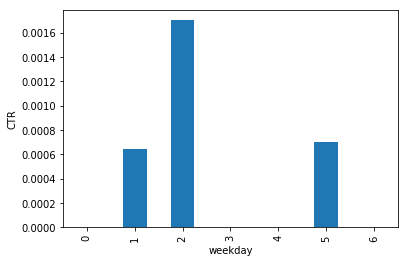

In [55]:
# CTR by weekday
df.groupby('weekday')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_weekday.png');

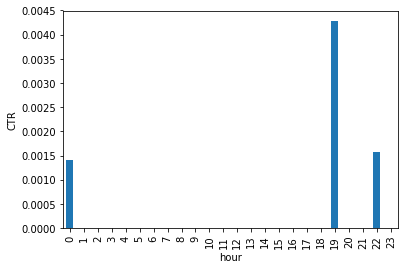

In [56]:
# CTR by hour
df.groupby('hour')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_hour.png');

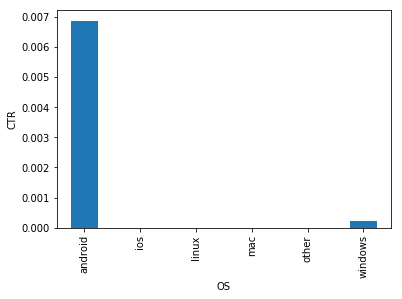

In [57]:
# CTR by OS
df.groupby('OS')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_OS.png');

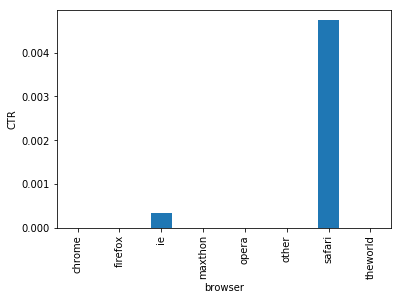

In [58]:
# CTR by Browser
df.groupby('browser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_browser.png');

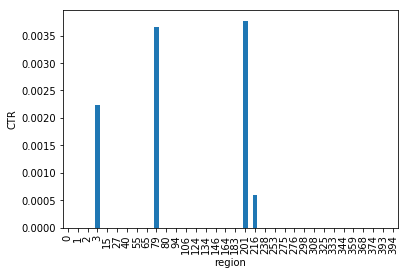

In [59]:
# CTR by region
df.groupby('region')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_region.png');

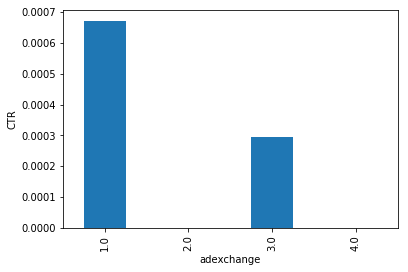

In [60]:
# CTR by adexchange
df.groupby('adexchange')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_adexchange.png');

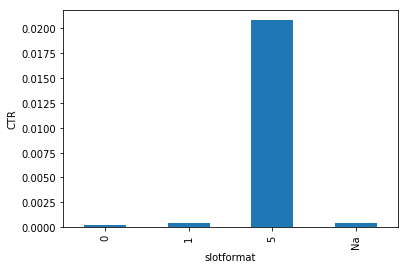

In [61]:
# CTR by slotformat
df.groupby('slotformat')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_slotformat.png');

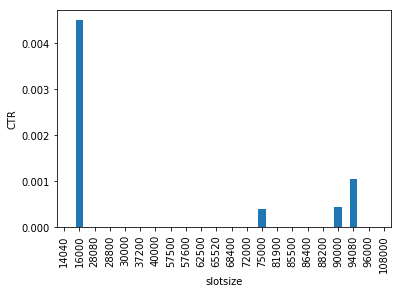

In [62]:
# CTR by slotsize
df.groupby('slotsize')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_slotsize.png');

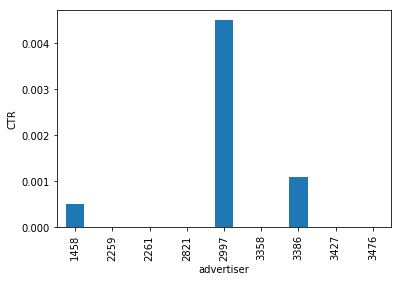

In [63]:
# CTR by advertiser
df.groupby('advertiser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig('CTR_by_advertiser.png');

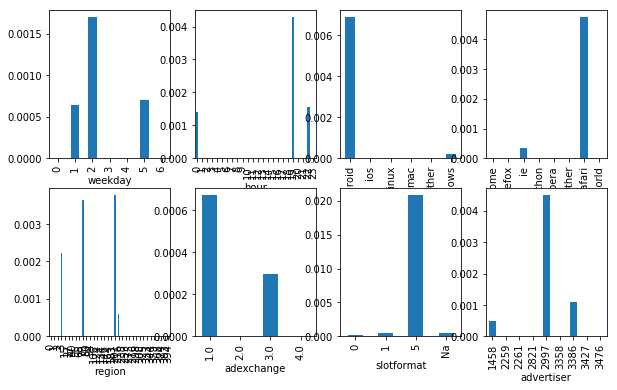

In [77]:
# Multi-figure version
# TODO requires some work to format
fig, axes = plt.subplots(2, 4, figsize=(10,6))
df.groupby('weekday')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 0])
df.groupby('hour')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 1])
df.groupby('OS')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 2])
df.groupby('browser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 3])
df.groupby('region')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 0])
df.groupby('adexchange')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 1])
df.groupby('slotformat')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 2])
df.groupby('advertiser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 3])
if OUTPUT_DATA: plt.savefig('CTR_multi.png');

# average cost-per-mille (CPM)

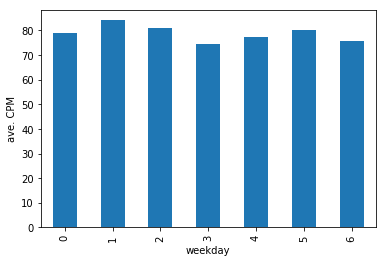

In [81]:
df.groupby('weekday')['payprice'].mean().plot(kind='bar')
plt.ylabel('ave. CPM');
if OUTPUT_DATA: plt.savefig('aCPM_by_weekday.png');

In [ ]:
# TODO repeat for other attributes

# effective cost-per-click (eCPC)

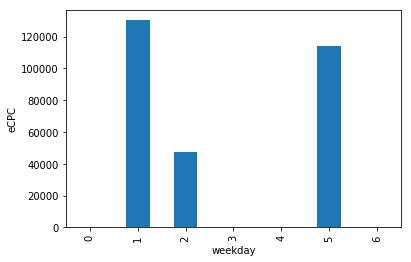

In [80]:
df2 = df.groupby('weekday').agg({'click': ['sum'], 'payprice': ['sum']})
df2['eCPC'] = np.where(df2['click'] == 0, df2['click'], df2['payprice'] / df2['click'])
df2['eCPC'].plot(kind='bar')
plt.ylabel('eCPC');
if OUTPUT_DATA: plt.savefig('eCPC_by_weekday.png');

In [ ]:
# TODO repeat for other attributes

# price

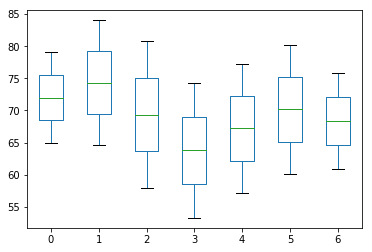

In [82]:
# TODO